**Part 1:**

The main purpose of this project was to build a CNN model that would classify if subject has a tumor or not based on MRI scan. I used the transfer learning of VGG-16 model architecture and weights to train the model for this binary problem. I used `accuracy` as a metric to justify the model.

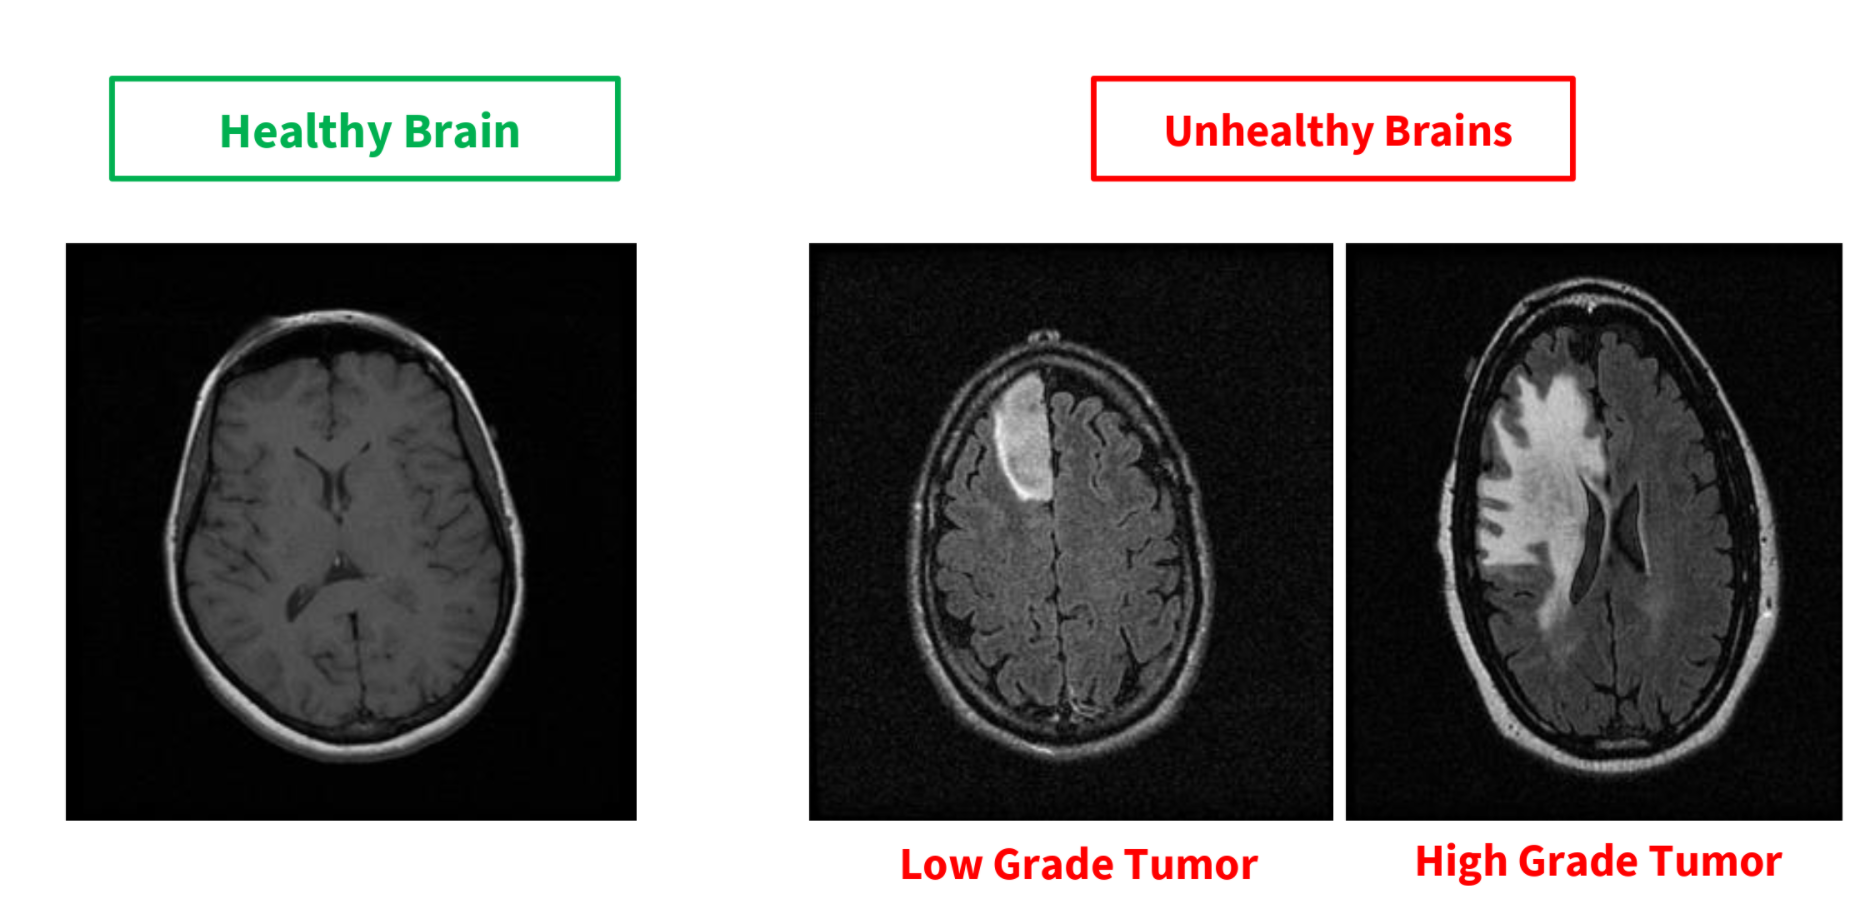



The image data that was used for this problem is Brain MRI Images for Brain Tumor Detection. It conists of MRI scans of two classes:

NO - no tumor, encoded as 0

YES - tumor, encoded as 1

**Table of Contents**

importing libraries

Image Data Loading

Visualizing with Colormaps

Equalized Hist Technique and K-Means clustring

Edge detection

Model traning (VGG-16)

Tesing model performance

Evaluation


# **Importing libraries**

In [1]:
import os
import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd
from random import sample

from sklearn.cluster import KMeans

# **Image Data Loading**

In [77]:

def load_img(path, resize=None):
    img= cv2.imread(path, 0)
    if resize:
        img= cv2.resize(img, resize)    
    return img

In [78]:
dir_path= '/content/drive/MyDrive/Dataset'
tumor_set=[]
non_tumor_set=[]

for label in os.listdir(dir_path):
    if label=='yes':
        path= os.path.join(dir_path, label)
        for img_path in tqdm(sample(glob.glob(path + '/*'), 30)):
            tumor_set.append(load_img(img_path))
    else:
        path= os.path.join(dir_path, label)
        for img_path in tqdm(sample(glob.glob(path + '/*'), 30)):
            non_tumor_set.append(load_img(img_path))

# **Visualizing with Colormaps**

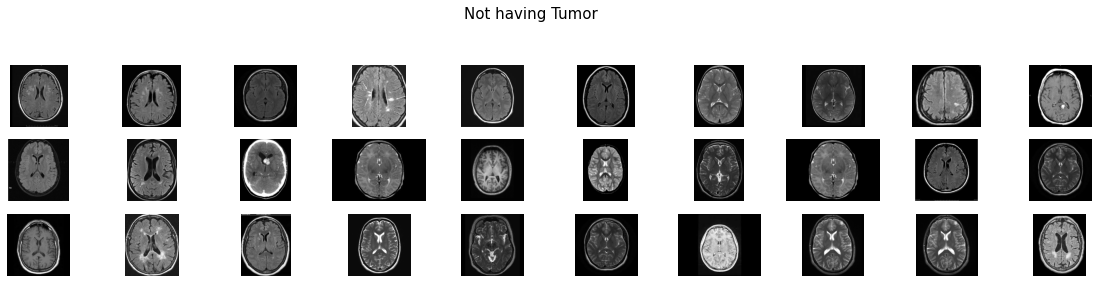

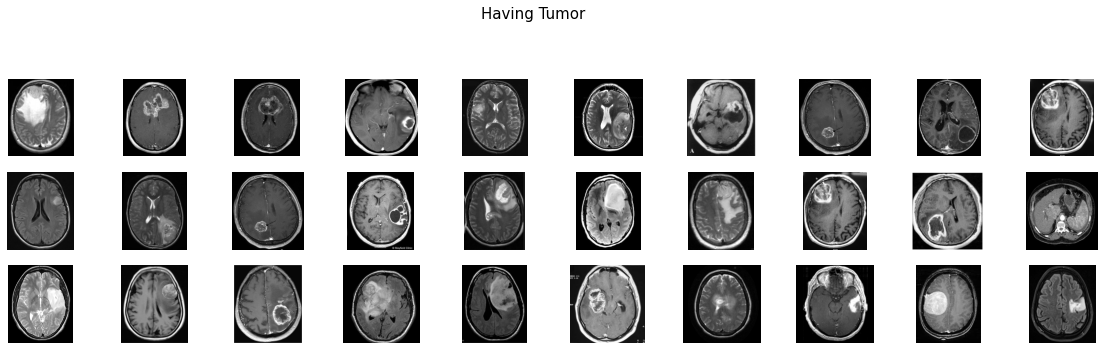

In [5]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(non_tumor_set[i], 'gray')
    plt.axis('off')
    c+=1    
plt.suptitle('Not having Tumor', size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(tumor_set[i], 'gray')
    plt.axis('off')
    c+=1  
plt.suptitle('Having Tumor', size=15)
plt.show()

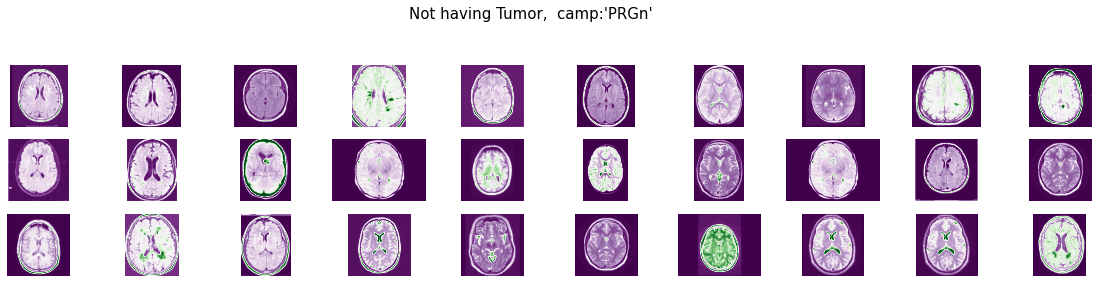

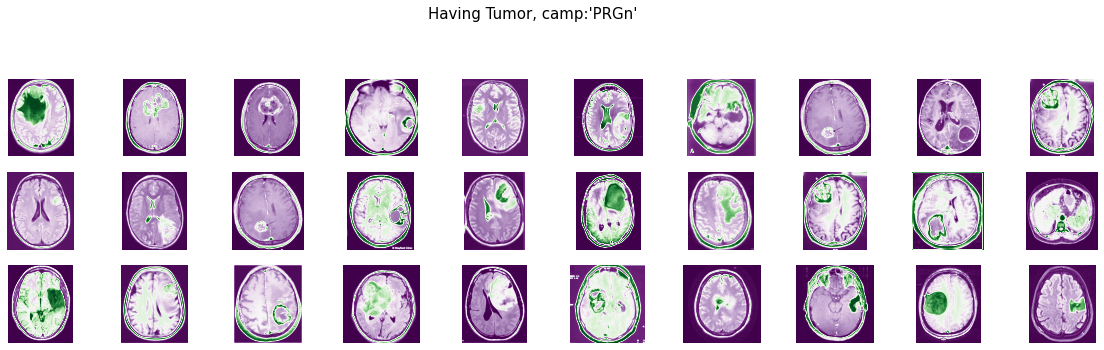

In [6]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(non_tumor_set[i], 'PRGn')
    plt.axis('off')
    c+=1    
plt.suptitle("Not having Tumor,  camp:'PRGn'", size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(tumor_set[i], 'PRGn')
    plt.axis('off')
    c+=1  
plt.suptitle("Having Tumor, camp:'PRGn'", size=15)
plt.show()

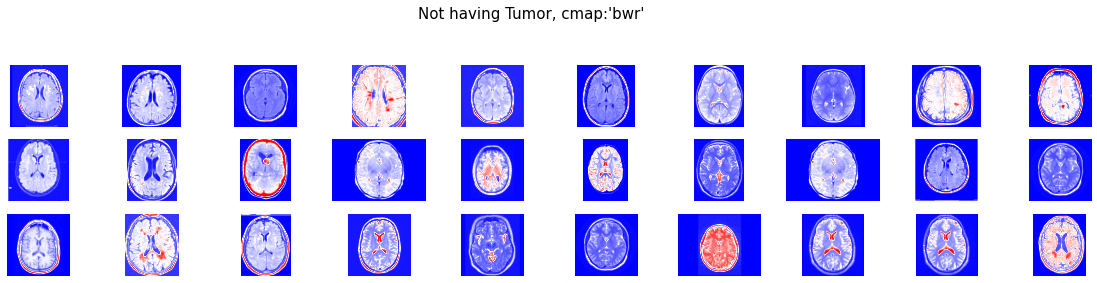

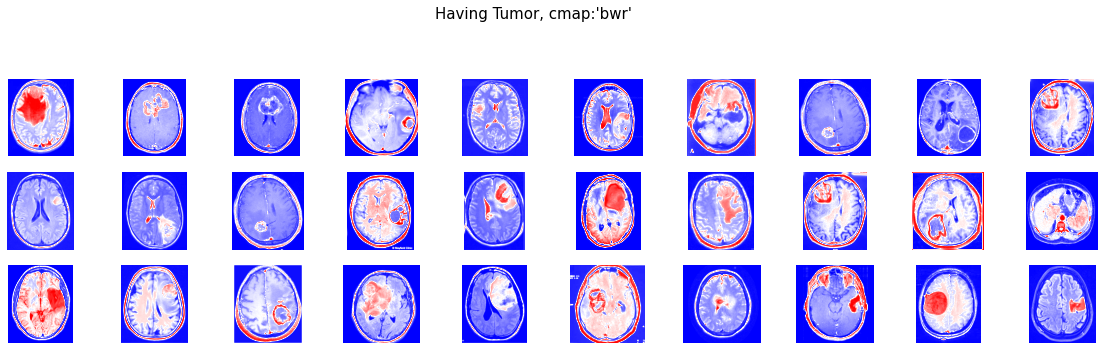

In [8]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(non_tumor_set[i], 'bwr')
    plt.axis('off')
    c+=1    
plt.suptitle("Not having Tumor, cmap:'bwr'", size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    plt.imshow(tumor_set[i], 'bwr')
    plt.axis('off')
    c+=1  
plt.suptitle("Having Tumor, cmap:'bwr'", size=15)
plt.show()

# **Equalized Hist**

In [9]:
def adaptive_hist(img, clipLimit= 4.0):
    window= cv2.createCLAHE(clipLimit= clipLimit, tileGridSize=(8, 8))
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

    ch1, ch2, ch3 = cv2.split(img_lab)
    img_l = window.apply(ch1)
    img_clahe = cv2.merge((img_l, ch2, ch3))
    return cv2.cvtColor(img_clahe, cv2.COLOR_Lab2BGR)

# **K-Means clustering**

In [10]:
def k_means(img, n_colors= 2):
    w, h, d = original_shape = tuple(img.shape)
    img= img/255.0
    image_array = np.reshape(img, (w * h, d))
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array)
    labels = kmeans.predict(image_array)
    
    """Recreate the (compressed) image from the code book & labels"""
    codebook= kmeans.cluster_centers_
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

Text(0.5, 0.98, 'Normal Brain MRI scan')

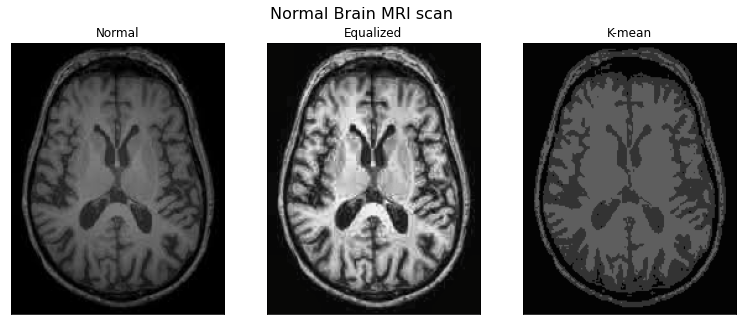

In [11]:
img_path= '/content/drive/MyDrive/Dataset/no/10 no.jpg'

f, ax= plt.subplots(1, 3, figsize=(13,5))
img= cv2.imread(img_path)
eq_hist_img= adaptive_hist(img)
kmeans_img= k_means(img, 3)

ax[0].imshow(img, aspect='auto')
ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].set_title('Normal')
ax[1].imshow(eq_hist_img,  aspect='auto')
ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].set_title('Equalized')
ax[2].imshow(kmeans_img,  aspect='auto')
ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].set_title('K-mean')

plt.suptitle('Normal Brain MRI scan', size=16)

Text(0.5, 0.98, 'Unhealthy Brain(Tumor) MRI scan')

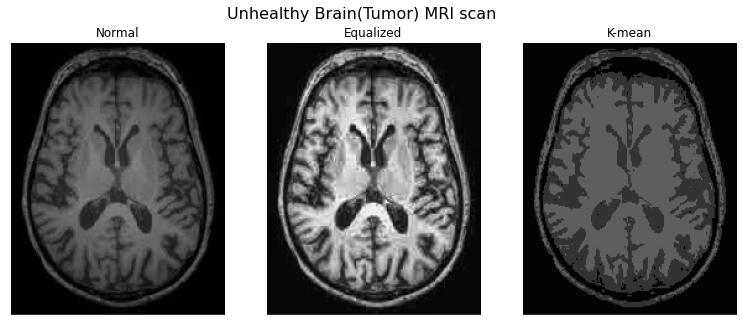

In [12]:
img_path= '/content/drive/MyDrive/Dataset/no/10 no.jpg'

f, ax= plt.subplots(1, 3, figsize=(13,5))
img= cv2.imread(img_path)
eq_hist_img= adaptive_hist(img)
kmeans_img= k_means(img, 3)

ax[0].imshow(img, aspect='auto')
ax[0].set_xticks([]); ax[0].set_yticks([]); ax[0].set_title('Normal')
ax[1].imshow(eq_hist_img,  aspect='auto')
ax[1].set_xticks([]); ax[1].set_yticks([]); ax[1].set_title('Equalized')
ax[2].imshow(kmeans_img,  aspect='auto')
ax[2].set_xticks([]); ax[2].set_yticks([]); ax[2].set_title('K-mean')

plt.suptitle('Unhealthy Brain(Tumor) MRI scan', size=16)

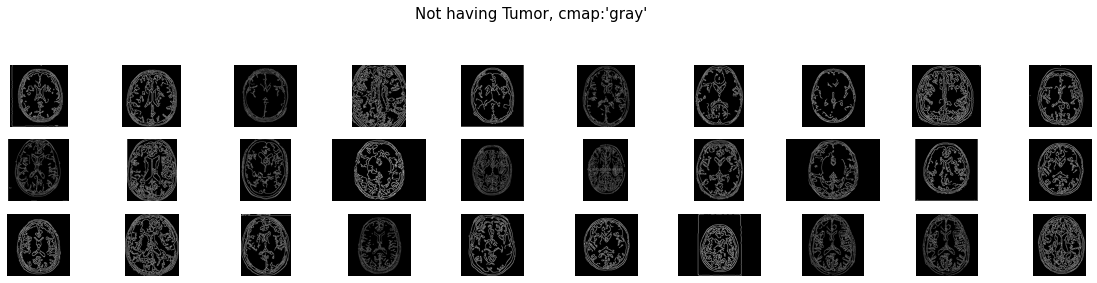

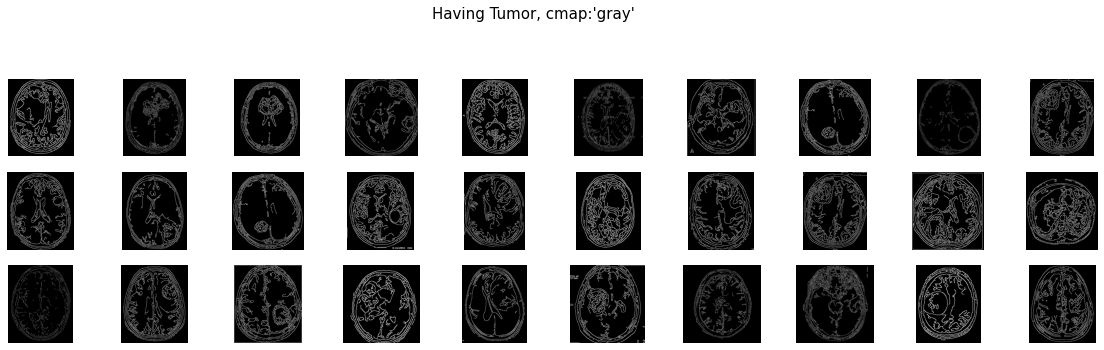

In [13]:
plt.figure(figsize=(20,8))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    ed= cv2.medianBlur(non_tumor_set[i], 5)
    ed= cv2.Canny(ed,100,20)
    plt.imshow(ed, 'gray')
    plt.axis('off')
    c+=1    
plt.suptitle("Not having Tumor, cmap:'gray'", size=15)
plt.show()


plt.figure(figsize=(20,10))
c=1
for i in range(30):
    plt.subplot(6,10,c)
    ed= cv2.medianBlur(tumor_set[i], 5)
    ed= cv2.Canny(ed,100,20)
    plt.imshow(ed, 'gray')
    plt.axis('off')
    c+=1  
plt.suptitle("Having Tumor, cmap:'gray'", size=15)
plt.show()

# **Model traning with transfer learning**

In [67]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [68]:
train_datagen = ImageDataGenerator(rescale=1./255,
    width_shift_range=0.05,
    rotation_range=12, 
    shear_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    validation_split=0.1225) # set validation split

In [69]:
train_data_dir= '/content/drive/MyDrive/Dataset'

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=26,
    class_mode='binary',
    subset='training') # set as training data

test_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(224, 224),
    batch_size= 30,
    class_mode='binary',
    subset='validation') # set as validation data

Found 223 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [70]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [71]:
def build_model():
    vgg= VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    vgg.layers
    for layer in vgg.layers:
        layer.trainable= False
    x= layers.Flatten()(vgg.output)
    x= layers.Dropout(0.25)(x)
    x= layers.Dense(1024, activation='relu')(x)
    x= layers.Dropout(0.15)(x)
    out= layers.Dense(1, activation='sigmoid')(x)
    
    return Model(inputs= vgg.input, outputs=out)

In [72]:
model= build_model()
model.compile(loss= tensorflow.keras.losses.BinaryCrossentropy(),
              optimizer=tensorflow.keras.optimizers.Adam(0.0002), metrics=['accuracy'])

In [73]:
early_stop= tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     mode='min', verbose=1, patience=4)

check= tensorflow.keras.callbacks.ModelCheckpoint(
    './model22_wg.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='min', save_freq='epoch')

In [57]:
his= model.fit_generator(train_generator,
                        steps_per_epoch= train_generator.samples // 26,
                        validation_data=test_generator,
                        validation_steps = 1.0,
                        epochs=100, callbacks=[check, early_stop])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
8/8 [==============================] - 115s 15s/step - loss: 1.2276 - accuracy: 0.6091 - val_loss: 0.7620 - val_accuracy: 0.6667

Epoch 00001: val_loss improved from inf to 0.76195, saving model to ./model22_wg.h5
Epoch 2/100
8/8 [==============================] - 115s 14s/step - loss: 0.4943 - accuracy: 0.8122 - val_loss: 0.5822 - val_accuracy: 0.7333

Epoch 00002: val_loss improved from 0.76195 to 0.58216, saving model to ./model22_wg.h5
Epoch 3/100
8/8 [==============================] - 115s 14s/step - loss: 0.4006 - accuracy: 0.8071 - val_loss: 0.5010 - val_accuracy: 0.7667

Epoch 00003: val_loss improved from 0.58216 to 0.50100, saving model to ./model22_wg.h5
Epoch 4/100
8/8 [==============================] - 114s 14s/step - loss: 0.3229 - accuracy: 0.8883 - val_loss: 0.3920 - val_accuracy: 0.8667

Epoch 00004: val_loss improved from 0.50100 to 0.39197, saving model to ./model22_wg.h5
Epoch 5/100
8/8 [==============================] - 113s 14s/step - loss: 0.2646 - ac

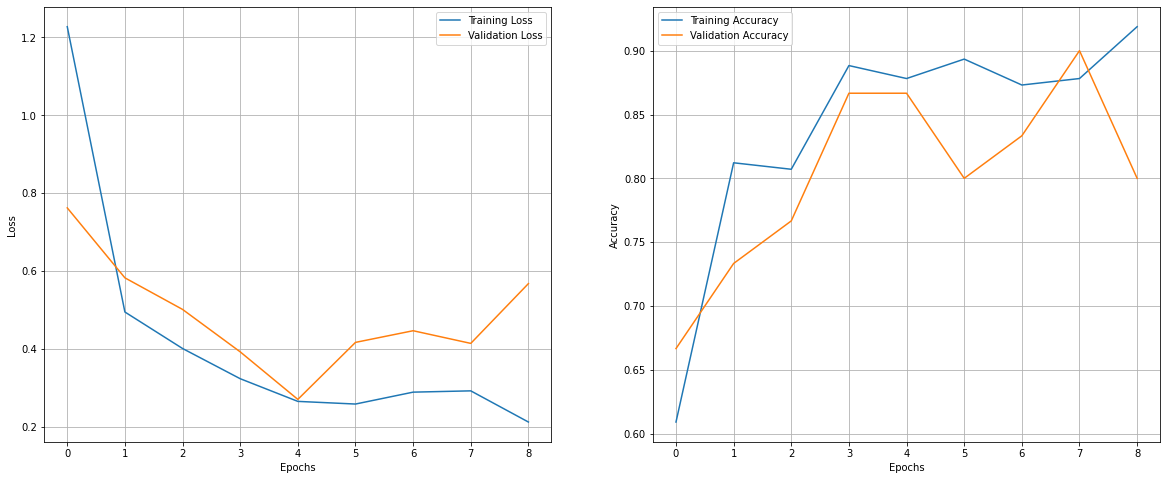

In [60]:
plt.figure(1, figsize = (20, 8))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( his.history["loss"], label = "Training Loss")
plt.plot( his.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( his.history["accuracy"], label = "Training Accuracy")
plt.plot( his.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

# **Tesing model performance**

In [74]:
imgs, labels = next(test_generator)

In [75]:
model.load_weights('/content/model22_wg.h5')

y_pred= model.predict(imgs)
y_pred= np.float32(y_pred>0.5)

print(confusion_matrix(labels,y_pred))
print('---------------------------')
print(classification_report(labels,y_pred))
print('---------------------------')
print(accuracy_score(labels,y_pred))

[[ 9  3]
 [ 1 17]]
---------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82        12
         1.0       0.85      0.94      0.89        18

    accuracy                           0.87        30
   macro avg       0.88      0.85      0.86        30
weighted avg       0.87      0.87      0.86        30

---------------------------
0.8666666666666667


# **Evaluation**

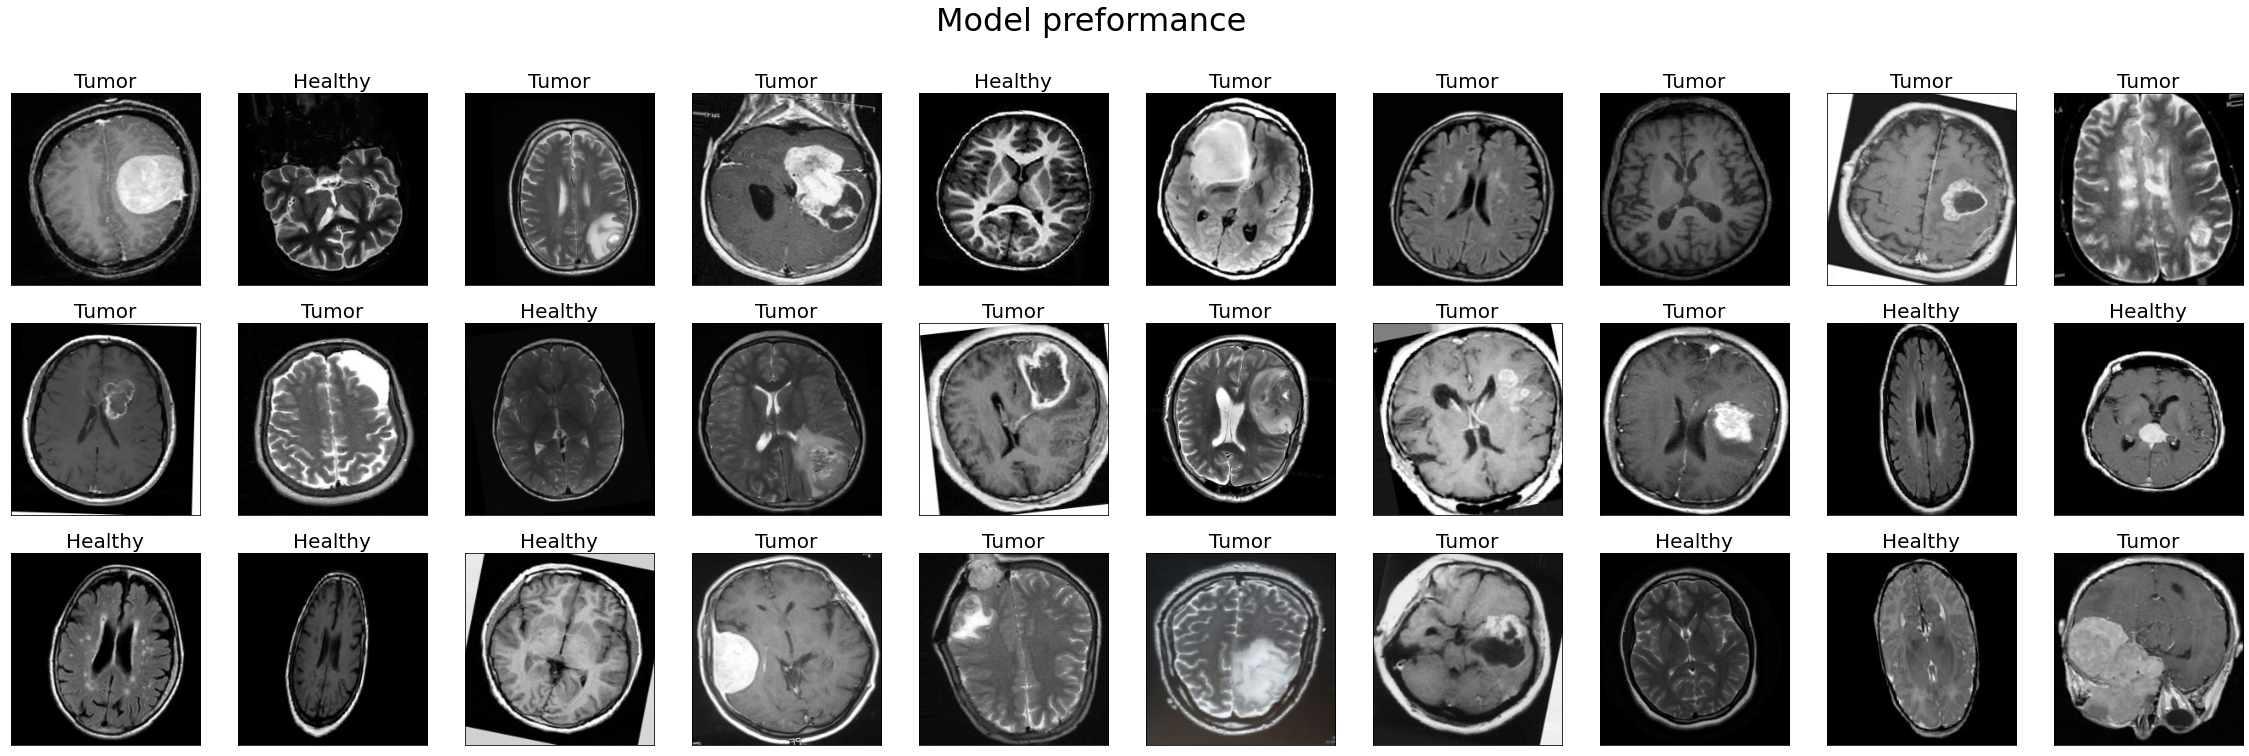

In [76]:
f, ax= plt.subplots(3, 10, figsize=(40, 12))
grd_truth= {0:'Healthy', 1:'Tumor'}
for i in tqdm(range(30)):
    ax[i//10][i%10].imshow(imgs[i], aspect='auto')
    ax[i//10][i%10].set_xticks([]); ax[i//10][i%10].set_yticks([]); 
    
    pred= int(model.predict(np.expand_dims(imgs[i], 0))>0.5)
    ax[i//10][i%10].set_title(grd_truth[pred], size=20)
    
plt.suptitle('Model preformance', size=32)    
plt.show()